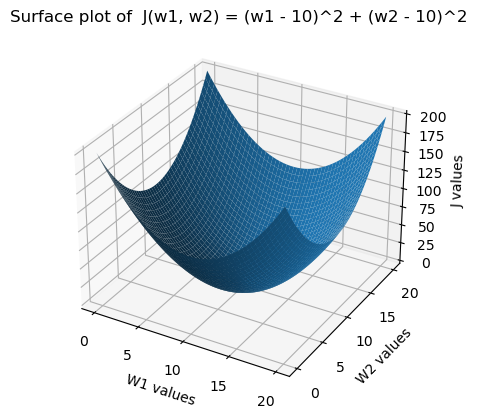

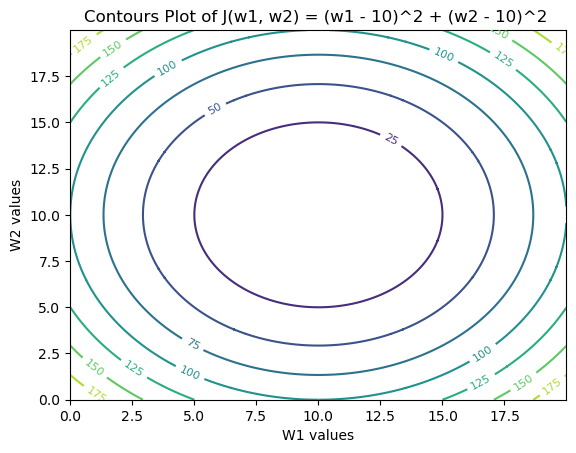

In [25]:
#Question 1
import numpy as np
import matplotlib.pyplot as pl
w1 = np.arange(0,20,0.01)
w2 = np.arange(0,20,0.01)
W1,W2 = np.meshgrid(w1,w2)
J = ((W1-10)**2+(W2-10)**2)
fig = pl.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.plot_surface(W1,W2,J)
ax.set_title("Surface plot of  J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2")
ax.set_xlabel('W1 values')
ax.set_ylabel('W2 values')
ax.set_zlabel('J values')
fig2,ax2=pl.subplots(1,1)
cp  = pl.contour(W1,W2,J)
pl.clabel(cp, fontsize=8)
ax2.set_title('Contours Plot of J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2 ')
ax2.set_xlabel('W1 values')
ax2.set_ylabel('W2 values')
pl.show()

In [26]:
#Question 2
#Bracketing method
def J(w):
    if w == 0:
        return float('inf')
    else:
        j = w**2 + (54/w)
        return j
def critical(a,b,n):
    print("Using exhaustive search", end = ',')
    delta  = (b-a)/n
    w1 = a
    w2 = w1 + delta
    w3 = w2+delta
    while w3<=b:
        if J(w1)>=J(w2)<=J(w3):
            tup1 = (w1,w3)
            print("Minimum of this function lies in the range",end = " ")
            return tup1
        elif J(w1)<=J(w2)>=J(w3):
            tup2 = (w1,w3)
            print("Maximum of this function lies in the range",end = " ")
            return tup2
        else:
            w1 = w2
            w2 = w3
            w3 = w3 + delta
    else:
        out = "No minimum or maximum between a and b"
        return out
# Interval Halving method
def interval_halving(a,b,E):
    L = b-a
    w_m = (a+b)/2
    while abs(L)>=E:
        Jw = J(w_m)
        w1 = a+L/4
        w2 = b-L/4
        Jw1 = J(w1)
        Jw2 = J(w2)
        if Jw1 < Jw:
            b = w_m
            w_m = w1
        elif Jw2 < Jw:
            a = w_m
            w_m = w2
        else:
            b = w2
            a = w1
            w_m = (a+b)/2
        L = b-a
    tup_3 = (a,b)
    return tup_3
a = 0
b = 5
n = 10
E = 0.00000000001
range_1 = critical(a,b,n)
print(range_1)   
range_2 = interval_halving(range_1[0],range_1[1],E)
print("Using interval halving method, the closer range received is", range_2)
#Newton Raphson Method
def dJ(w):
     if w == 0:
        return float('inf')
     else:
        j = 2*w - 54/(w**2)
        return j
def d2J(w):
     if w == 0:
        return float('inf')
     else:
        j = 2 + 108/(w**3)
        return j
def Newton_Raphson(E):
    x1 =1
    k =1 
    while abs(dJ(x1)) >= E:
        x2 = x1 - (dJ(x1)/d2J(x1))
        k = k+1
        x1 = x2
    
    return x1
critical = Newton_Raphson(E)
if d2J(critical) > 0:
    print("Using Newton Raphson method, The approximated minimum occurs at w =",critical)
if d2J(critical) < 0:
    print("Using Newton Raphson method, The approximated maximum occurs at w =",critical)




    


Using exhaustive search,Minimum of this function lies in the range (2.5, 3.5)
Using interval halving method, the closer range received is (2.999999999996362, 3.000000000003638)
Using Newton Raphson method, The approximated minimum occurs at w = 2.9999999999999982


Using exhaustive search,Maximum of this function lies in the range (1.0471975511965976, 2.0943951023931953)
Using interval halving method, the closer range received is (1.570796326307257, 1.5707963272825358)
Using Newton Raphson method, The approximated maximum occurs at w = 1.5707963267948966


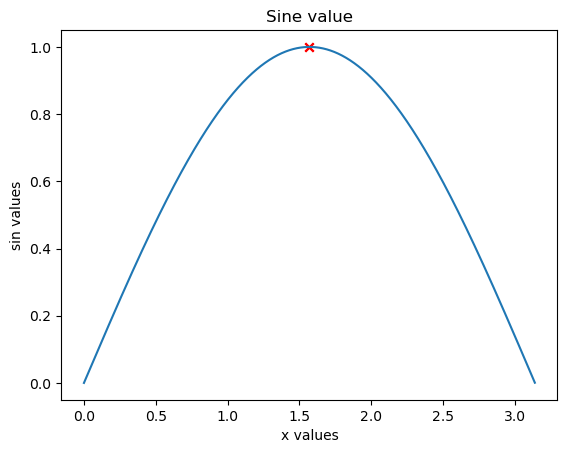

In [27]:
#Question 3
#Bracketing method
import math
import matplotlib.pyplot as pl
import numpy as np
def J(w):
        j = math.sin(w)
        return j
def critical_exhaust(a,b,n):
    print("Using exhaustive search",end = ",")
    delta  = (b-a)/n
    w1 = a
    w2 = w1 + delta
    w3 = w2+delta
    while w3<=b:
        if J(w1)>=J(w2)<=J(w3):
            tup1 = (w1,w3)
            print("Minimum of this function lies in the range",end = " ")
            c = 'min'
            return tup1,c
        elif J(w1)<=J(w2)>=J(w3):
            tup2 = (w1,w3)
            print("Maximum of this function lies in the range",end = " ")
            c = 'max'
            return tup2,c
        else:
            w1 = w2
            w2 = w3
            w3 = w3 + delta
    else:
        out = "No minimum or maximum between a and b"
        c = None
        return out,c
# Interval Halving method
def interval_halving(a,b,code,E):
    L = b-a
    w_m = (a+b)/2
    if code == 'min':
        while abs(L)>=E:
            Jw = J(w_m)
            w1 = a+L/4
            w2 = b-L/4
            Jw1 = J(w1)
            Jw2 = J(w2)
            if Jw1 < Jw:
                b = w_m
                w_m = w1
            elif Jw2 < Jw:
                a = w_m
                w_m = w2
            else:
                b = w2
                a = w1
                w_m = (a+b)/2
            L = b-a
        tup_3 = (a,b)
        return tup_3
    elif code == 'max':
        while abs(L)>=E:
            Jw = J(w_m)
            w1 = a+L/4
            w2 = b-L/4
            Jw1 = J(w1)
            Jw2 = J(w2)
            if Jw1 > Jw:
                b = w_m
                w_m = w1
            elif Jw2 > Jw:
                a = w_m
                w_m = w2
            else:
                b = w2
                a = w1
                w_m = (a+b)/2
            L = b-a
        tup_3 = (a,b)
        return tup_3
    else:
        print("No maximum or minimum in this range.")
    
    
a = 0
b = math.pi
n = 6
E = 0.000000001
range_1,c = critical_exhaust(a,b,n)
print(range_1)   
range_2 = interval_halving(range_1[0],range_1[1],c,E)
print("Using interval halving method, the closer range received is", range_2)
#Newton Raphson Method
def dJ(w):
    return math.cos(w)
def d2J(w):
    return math.sin(w)*-1
def Newton_Raphson(E):
    x1 = 0.5
    k = 1 
    while abs(dJ(x1)) >= E:
        x2 = x1 - (dJ(x1)/d2J(x1))
        k = k+1
        x1 = x2
    
    return x1
critical = Newton_Raphson(E)
if d2J(critical) > 0:
    print("Using Newton Raphson method, The approximated minimum occurs at w =",critical)
if d2J(critical) < 0:
    print("Using Newton Raphson method, The approximated maximum occurs at w =",critical)

    
x = np.array([critical,math.pi/2])
x1 = np.arange(0,math.pi,0.001)
y = np.sin(x)
y1 = np.sin(x1)
pl.scatter(x,y,marker = 'x',color = 'r')
pl.plot(x1,y1)
pl.title("Sine value")
pl.xlabel('x values')
pl.ylabel('sin values')
pl.show()
#Since my value obtained from Newton Raphson is very close to pi/2 which is the point of minima,Both the points are coinciding and I am getting a single point in plot